In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
vehicle=pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [227]:
vehicle.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [228]:
#I am dropping the cars columns as it doesn't have a value most of the times
vehicle.drop(['car'],axis='columns',inplace=True)

In [229]:
columns_to_fill = ['CoffeeHouse', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_to_fill:
    vehicle[column] = vehicle[column].fillna('never')

In [230]:
from sklearn.preprocessing import LabelEncoder
lecol=['destination','passanger','weather','time','coupon','expiration','gender','age',
'maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
'RestaurantLessThan20','Restaurant20To50']
for col in vehicle[lecol]:
  le=LabelEncoder()
  vehicle[col]=le.fit_transform(vehicle[col])

In [240]:
vehicle.nunique()

,0
destination,3
passanger,4
weather,3
temperature,3
time,5
coupon,5
expiration,2
gender,2
age,8
maritalStatus,5


In [211]:
vehicle_new=vehicle.copy()
vehicle_new.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [212]:
#Using  z-score where we take the mean out of the dataset columns and then add
#and subtract the standard deviation 3 times to get the values which are not far
#apart and don't ruin the data.
upp_lim=vehicle_new.mean()+3*vehicle_new.std()
low_lim=vehicle_new.mean()-3*vehicle_new.std()
vehicle_new=vehicle_new[((vehicle_new)<upp_lim) & ((vehicle_new)>low_lim)]

In [213]:
vehicle_new.fillna(0,inplace=True) #Ek column dikkat de raha tha sab sahi karne par bhi 0 ki jagah na de raha tha

In [234]:
vehicle['occupation'].unique()

array([24,  0, 22,  7, 11, 10, 21, 15,  1,  5, 14, 17,  4, 16,  6, 13, 20,
       12, 23,  3, 19,  9, 18,  2,  8])

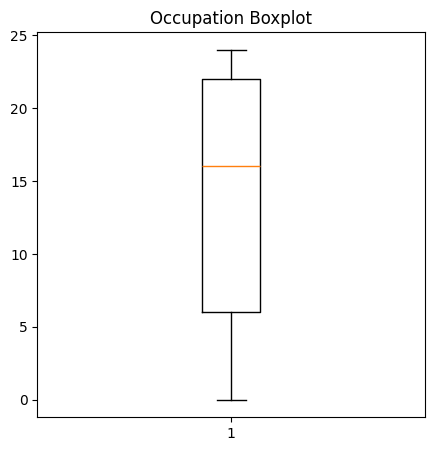

In [242]:
plt.figure(figsize=(5,5))
#The occupation column seems to have some outliers
plt.boxplot(vehicle['occupation'],vert=True,**{'sym': '+'})
plt.title('Occupation Boxplot')
plt.show()

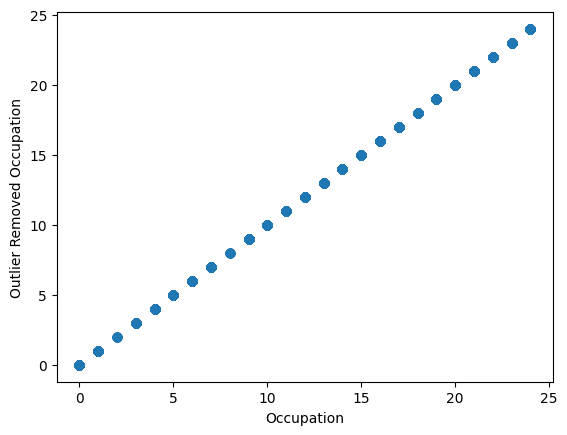

In [243]:
plt.scatter(vehicle['occupation'],vehicle_new['occupation'])
plt.xlabel('Occupation')
plt.ylabel('Outlier Removed Occupation')
plt.show()

In [214]:
vehicle_new.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,4,1,0,0.0,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,1,0,0.0,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,4,4,1,0,0.0,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,1,0,0.0,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,4,4,1,0,0.0,1,0,0,1,0


In [215]:
#Outlier Removal using numerical feature
def outliers(dataset,max_error=0.75):
  for col in dataset.columns:
   up_limit=dataset[col].quantile(max_error)
   low_limit=dataset[col].quantile(1-max_error)
   outlier_idx=dataset.index[(dataset[col]>up_limit)|(dataset[col]<low_limit)]
   dataset.drop(outlier_idx,inplace=True)
   return dataset

In [216]:
outliers(vehicle,max_error=0.75)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,4,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,4,4,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,4,4,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,0,0,1,30,1,2,1,1,1,2,...,4,0,1,0,1,1,0,0,1,0
12676,0,0,2,80,3,3,0,1,1,2,...,4,0,1,0,1,0,0,1,0,1
12677,0,3,2,30,3,4,0,1,1,2,...,4,0,1,0,1,1,1,0,1,1
12678,0,3,2,30,1,4,1,1,1,2,...,4,0,1,0,1,1,0,1,0,0
